<a href="https://colab.research.google.com/github/ralbu85/DataScience_2022S/blob/master/PCA_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('country.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
country = df['country']
df2 = df.drop(columns='country')
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## 정규화

In [3]:
df_norm = (df2 - df2.mean())/df2.std()

## PCA 학습 및 변환

In [4]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_norm)
Z = pca.transform(df_norm)

## 주성분의 설명력 살펴보기

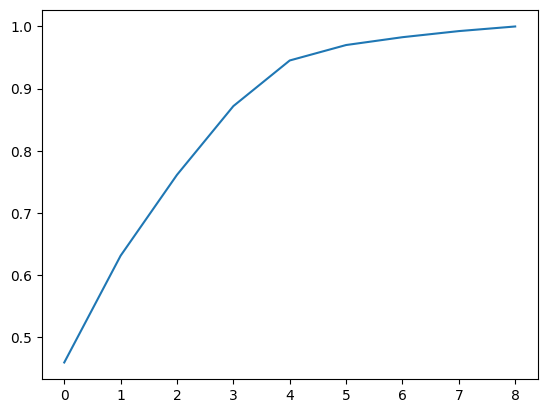

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))


## 주성분 그려보기

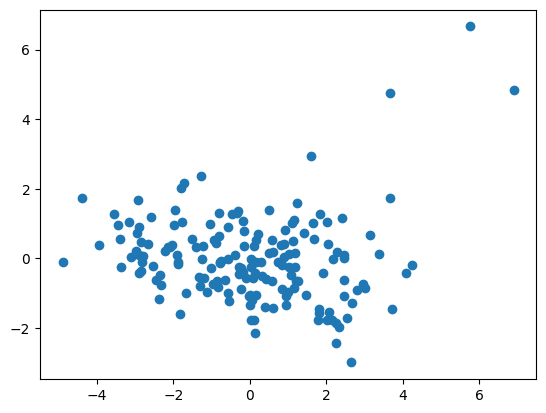

In [11]:
z1 = Z[:,0]
z2 = Z[:,1]
plt.scatter(z1,z2)

In [14]:
factor = pca.components_[:2,:]

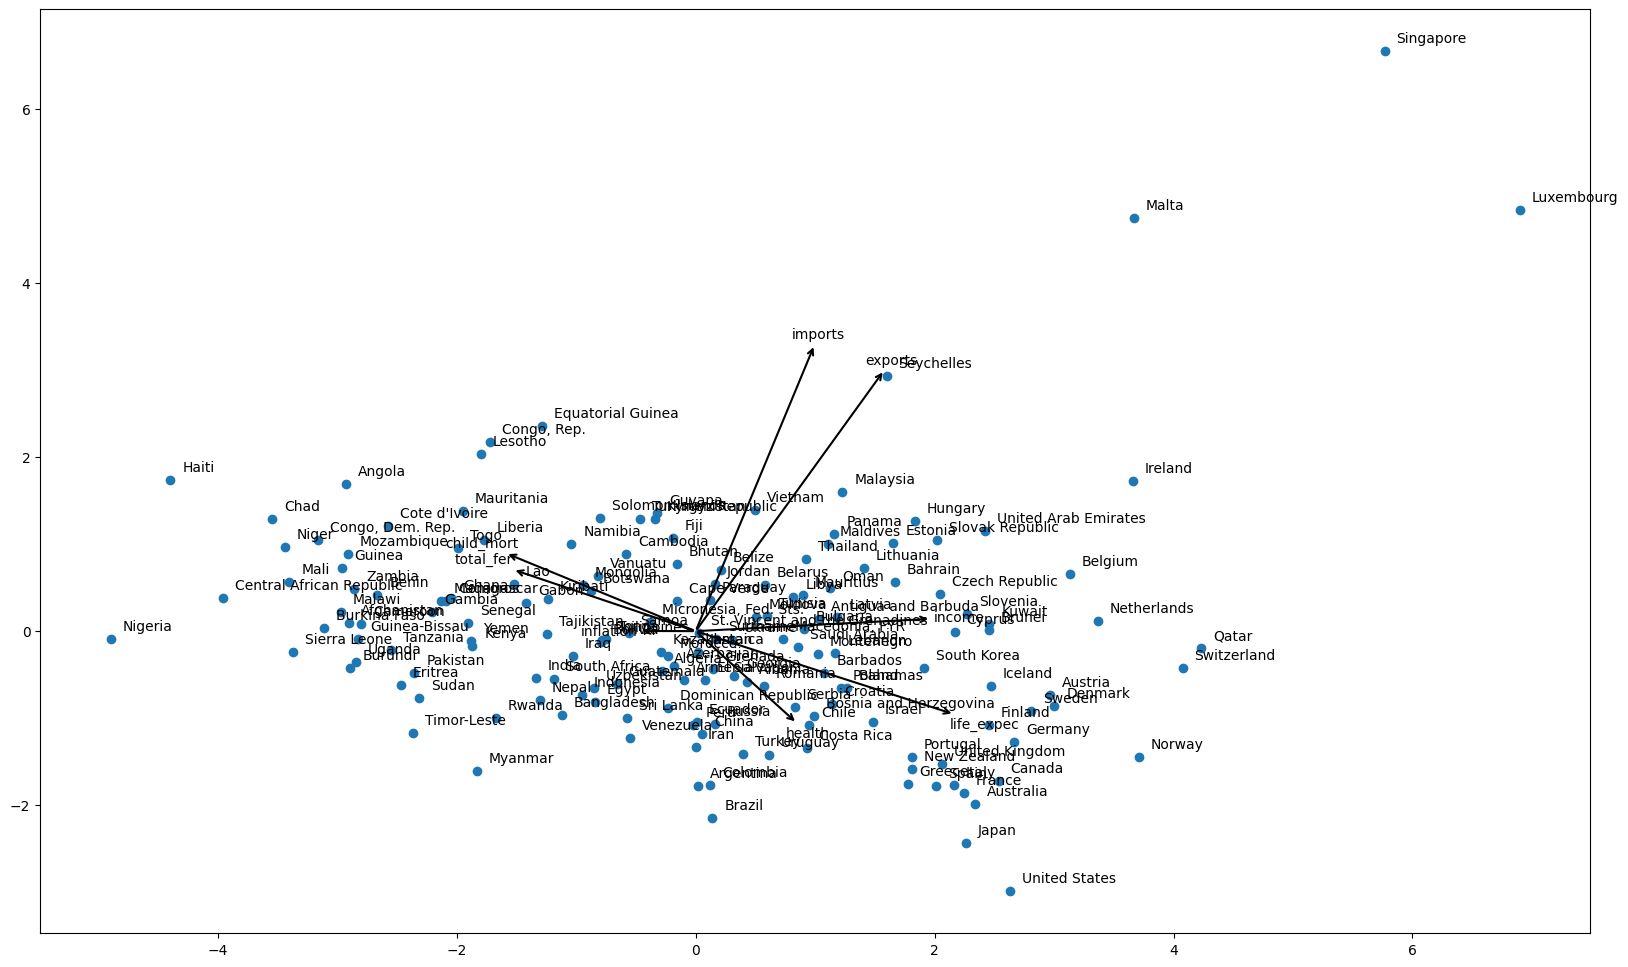

In [20]:
plt.figure(figsize=(20,12))
plt.scatter(z1,z2)

for i in range(len(Z)):
    plt.annotate(country[i], (z1[i]+0.1, z2[i]+0.1))

for i in range(8):
    plt.annotate(df2.columns[i],xy=(0,0),xytext=(factor[:,i]*5),arrowprops={'lw':1.5, 'arrowstyle':'<-'})